
**Описание работы:**

Бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета - описательный блок по каждому курсу на основании рассчитанных показателей. Далее идет расчет потенциальной нагрузки на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность.
<br><br>
_________

[Описание данных](#Описание-данных) <br>
[1. Описание и начальная работа с данными](#1.-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>


## Описание данных

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Подготовка данных и их описание. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объединим датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создадим для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
 <br>
1.Расчеты:
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2.Построение bar-chart, отражающего количество студентов на каждом курсе      
3.Построение горизонтального bar-chart, отражающего количество студентов на каждом курсе. 
4. Описание данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.plotting import register_matplotlib_converters

# Открытие датафреймов из файлов .csv, находящихся в папке 'Data':

d1 = pd.read_csv('Data/courses.csv')
d2 = pd.read_csv('Data/course_contents.csv')
d3 = pd.read_csv('Data/progresses.csv')
d4 = pd.read_csv('Data/progress_phases.csv')
d5 = pd.read_csv('Data/students.csv')

# Переименовывание названий некоторых столбцов:

d1 = d1.rename(columns={'id': 'course_id'})
d1 = d1.rename(columns={'title': 'course_title'})
d1 = d1.rename(columns={'field': 'course_field'})
d3 = d3.rename(columns={'id': 'progress_id'})
d5 = d5.rename(columns={'id': 'student_id'})

# Удаление ненужного столбца:

d1 = d1.drop(columns='Unnamed: 0')

# Объединение датафреймов d1, d2, d3, d4:
main1 = pd.merge(d1, d2)
main2 = pd.merge(d3, d4)
main = pd.merge(main1, main2)
main.head()


,course_id,course_title,course_field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-03-29 17:02:32.838469+00,2019-04-13 17:32:19.134874+00
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791,done,2019-06-13 19:22:19.331201+00,2019-06-13 19:51:21.987534+00
2,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,36079c0615d85f3cebfa47542b43ab41,ab7f5c720e3a5e1de00c2cdbef19fbf0,done,2019-03-27 06:56:51.138795+00,2019-03-27 06:56:54.834751+00
3,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,37384cbeb141835cc61b5fd22abd9200,29ab3f8c52a858bea2d3b9a51c433578,done,2019-05-28 11:09:29.320478+00,2019-05-29 06:47:21.794092+00
4,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,3a79d622c4057c1c029c74e282e43396,72afe01498ba14045467fc32029b650c,done,2019-03-24 07:03:03.582679+00,2019-03-24 09:50:32.595199+00


In [2]:
# Общее кол-во курсов в датасете - это кол-во уникальных значений в 'course_title':

main['course_title'].describe()['unique']

15

In [3]:
# Кол-во модулей на каждом курсе - это максимальное значение столбца 'module_number'
# (номера модуля) для каждого курса:

main.groupby('course_title').agg('max')['module_number']

course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

In [4]:
# Кол-во уроков в каждом модуле на каждом курсе (по названию курса и номеру модуля) - это максимальное значение столбца
# 'lesson_number' в каждом модуле на каждом курсе:

data1 = main.groupby(['course_title', 'module_number']).agg('max')['lesson_number']
data1.head(15)

course_title      module_number
Excel Базовый     1                11
                  2                 7
                  3                 3
                  4                 7
                  5                 5
                  6                 5
                  7                 5
                  8                 5
                  9                 1
Java-разработчик  1                 8
                  2                 8
                  3                 9
                  4                 9
                  5                 7
                  6                 6
Name: lesson_number, dtype: int64

In [5]:
# Медианное кол-во уроков в модуле на каждом курсе - медианное значение data1 для каждого курса в отдельности:

data2 = data1.groupby(level='course_title').median()
data2

course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                13.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_number, dtype: float64

In [6]:
# Кол-во учеников на каждом курсе - это кол-во уникальных значений в столбце 'student_id' для каждого курса:

data3 = main.groupby(['course_title'])['student_id'].describe()['unique']
data3

course_title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: unique, dtype: object

In [7]:
# Удаляем пропущенные значения из датафрейма d5 и объединяем его с датафреймами d1, d3, d4 для нужных нам
# данных из файлов 'courses.csv','progresses.csv','progress_phases.csv':

d5 = d5.dropna()
main3 = pd.merge(main2, d1)
students = pd.merge(d5, main3)

# Конвертируем данные из столбцов 'birthday' и 'start_date' в формат datetime64:

students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')
students = students.dropna()
students['start_date'] = students['start_date'].astype('datetime64')

# Вычисляем возраст студентов (на момент поступления студента на курс) и переводим в года:

students['age'] = students['start_date'] - students['birthday']
students['age'] = students['age'].apply(lambda x: int(x.days / 365.2425))

# Будем считать, что реальному студенту курсов от 10 до 90 лет, чтобы очистить данные от ошибок в сведениях 
# о датах рождения:

students = students[(students['age'] > 10) & (students['age'] < 90)]

# Минимальный, максимальный, средний, медианный возраст студентов:

students['age'].describe()[['min', 'max', 'mean', '50%']]


min     11.000000
max     89.000000
mean    28.153734
50%     27.000000
Name: age, dtype: float64

In [8]:
# Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе:

students.groupby(['course_title'])['age'].describe()[['min', 'max', 'mean', '50%']]

,min,max,mean,50%
course_title,,,,
Excel Базовый,15.0,59.0,31.661105,32.0
Java-разработчик,13.0,63.0,28.205374,27.0
Java-разработчик c нуля,13.0,54.0,28.480648,28.0
JavaScript с нуля,12.0,58.0,26.927838,26.0
PHP-разработчик с 0 до PRO. Часть 1,12.0,73.0,29.641100,28.0
SMM-маркетолог от А до Я,16.0,51.0,27.316631,26.0
UX-дизайн,13.0,83.0,28.666846,28.0
Анимация интерфейсов,13.0,49.0,28.156508,27.0
Веб-вёрстка для начинающих 2.0,11.0,58.0,27.023593,26.0


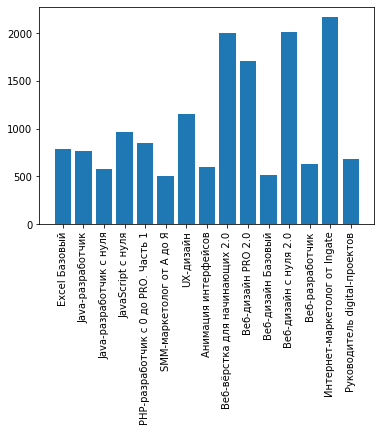

In [9]:
# Строим bar-chart, отражающий количество студентов на каждом курсе:

fig, subplot = plt.subplots()
subplot.bar(data3.index.values, data3.values)
plt.xticks(rotation='vertical')
plt.show()

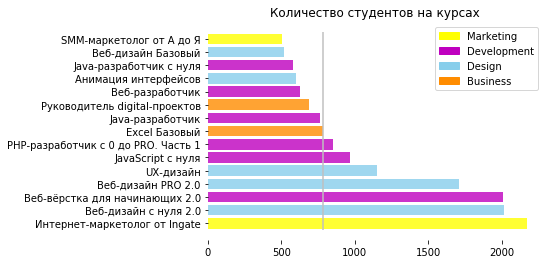

In [10]:
# Формируем данные для графика (кол-во студентов, курс и сфера, к которой относится курс):

data4 = main.groupby(['course_title'])['student_id', 'course_field'].describe()
data4 = data4.sort_values(('student_id', 'unique'), ascending=False)
data4 = data4.loc[:, [('student_id', 'unique'), ('course_field', 'top')]]

fig, subplot = plt.subplots()

# Формируем список цветов столбцов на графике в зависимости от сферы курса:

a = data4[('course_field', 'top')].values
c = []
for i in a:
    if i == 'Development':
        c.append('m')
    elif i == 'Design':
        c.append('skyblue')
    elif i == 'Marketing':
        c.append('yellow')
    else:
        c.append('darkorange')
        
# Строим bar chart  (прозрачность намеренно выставлена alpha=0.8, т.к. при alpha=0.1 ничего не видно) :

subplot.barh(
    data4.index.values, data4[('student_id', 'unique')], color=c, alpha=0.8)
subplot.set_title('Количество студентов на курсах')

# Добавляем легенду на график (по желанию можно также выставить параметр alpha=0.8):

patch1 = mpatches.Patch(color='yellow', label='Marketing')
patch2 = mpatches.Patch(color='m', label='Development')
patch3 = mpatches.Patch(color='skyblue', label='Design')
patch4 = mpatches.Patch(color='darkorange', label='Business')
plt.legend(handles=[patch1, patch2, patch3, patch4])

# Рассчитываем координату медианы и строим её:

m = np.median(data4[('student_id', 'unique')].values)
subplot.vlines(m, ymin=-0.5, ymax=14.5, color='silver')

# Удаляем все рамки графика:

subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)
subplot.spines['left'].set_visible(False)
subplot.spines['bottom'].set_visible(False)

plt.show()


**Описание данных на основании рассчитанных показателей** : у нас 15 образовательных курсов из 4 различных сфер: marketing,
development, design, business, на которых обучается в сумме 9794 студентов. В среднем на каждом курсе по 17 модулей (медианное 
значение), минимальное количество - 8, максимальное - 21. В среднем в каждом модуле по 5 уроков(медианное значение), при этом 
минимальное кол-во - 1, максимальное -29. Максимальное число студентов учится на курсе "Интернет-маркетолог от ingate", 
минимальное -  на курсе "SMM-маркетолог",в среднем на курсах по m=782 студента(медианное значение). При этом наибольшее 
кол-во студентов обучается на курсах в сфере design (5992 студентов), ненамного меньше в сфере development (5796 студентов), наименьшее кол-во студентов - в сфере business (1467 студентов). Средний возраст студентов на момент поступления на курс - около 27 лет, при этом на курсе "Веб-разработчик" обучаются более молодые студенты - им в среднем по 25 лет, а на курсе "Excel Базовый" студенты постарше - им в среднем по 32 года. Минимальный и максимальный возраст студентов - 11 и 89 лет соответственно.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчет прироста студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). (Дату начала прохождения курса студентом - дата начала первой домашней работы)            
2. На основании первого пункта построим line-graph с приростом студентов в каждом месяце для каждого курса                
3. На основании первого пункта построим line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике                    
4. Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса.(Выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)        
5. line-graph по четвертому пункту. 15 графиков                
6. Построим один line-graph для всех курсов по четвертому пункту. 15 линий на графике                
7. Вывод           

In [11]:
# Выбираем из основного датафрейма main нужные для расчета столбцы:

data5 = main.loc[:, ['course_title','module_number','lesson_title','student_id','status','start_date']]

# Т.к. считать дату начала прохождения курса студентом нужно по дате начала первой домашней работы, а в курсе "Веб-дизайн 
# Базовый" первая домашнаяя работа находится в третьем модуле, а в остальных курсах - в первом модуле, то сформируем новый
# датафрейм  data8 только из нужных нам значений:

data5 = data5[(data5['lesson_title'] == 'Домашняя работа') ]
data6 = data5[(data5['course_title'] == 'Веб-дизайн Базовый') & (data5['module_number'] == 3)]
data7 = data5[(data5['module_number'] == 1)]
data8 = data6.append(data7)

# Конвертируем данные из столбца 'start_date' в формат datetime64 :

data8['start_date'] = data8['start_date'].astype('datetime64')

# Добавляем в датафрейм столбцы с годами и месяцами начала прохождения курса и группируем данные по этим столбцам:

data8['year'] = data8['start_date'].apply(lambda x: x.year)
data8['month'] = data8['start_date'].apply(lambda x: x.month)
data8 = data8.groupby(['course_title','year','month']).agg(['nunique'])['student_id']

# Прирост студентов на каждом курсе в каждом месяце за всю историю(без месяцев, прирост в которых равен нулю):

data8

nunique
course_title                  year month         
Excel Базовый                 2018 2            6
                                   3            3
                                   5            3
                                   6            9
                                   7           13
...                                           ...
Руководитель digital-проектов 2019 3           36
                                   4           17
                                   5           25
                                   6           15
                                   7           20

[244 rows x 1 columns]

In [12]:
# Чтобы добавить в полученный датафрейм значения с нулевым приростом, создадим датафрейм, аналогичный полученному, но
# с нулевыми значениями :

indx = pd.MultiIndex.from_product(
    [
        list(data8.index.levels[0]),
        list(data8.index.levels[1]),
        list(data8.index.levels[2])
    ],
    names=['course_title', 'year', 'month'])

data80 = pd.DataFrame(0, indx, ['nunique'])

# Удалим значения до марта 2016 и после июля 2019:

a = list(data8.index.levels[0])
for i in a:
    data80 = data80.drop(index=(i, 2016, 1))
    data80 = data80.drop(index=(i, 2016, 2))
    data80 = data80.drop(index=(i, 2019, 12))
    data80 = data80.drop(index=(i, 2019, 11))
    data80 = data80.drop(index=(i, 2019, 10))
    data80 = data80.drop(index=(i, 2019, 9))
    data80 = data80.drop(index=(i, 2019, 8))

# Соединяем датафреймы, преобразуем вид:

data81 = data80.merge(data8, how='left', left_index=True, right_index=True)
data81 = data81.drop(columns='nunique_x')
data81 = data81.fillna(0)

# Прирост студентов на каждом курсе в каждом месяце за всю историю с марта 2016 по июль 2019 (с месяцами, прирост в
# которых равен нулю):
data81


nunique_y
course_title                  year month           
Excel Базовый                 2016 3            0.0
                                   4            0.0
                                   5            0.0
                                   6            0.0
                                   7            0.0
...                                             ...
Руководитель digital-проектов 2019 3           36.0
                                   4           17.0
                                   5           25.0
                                   6           15.0
                                   7           20.0

[615 rows x 1 columns]

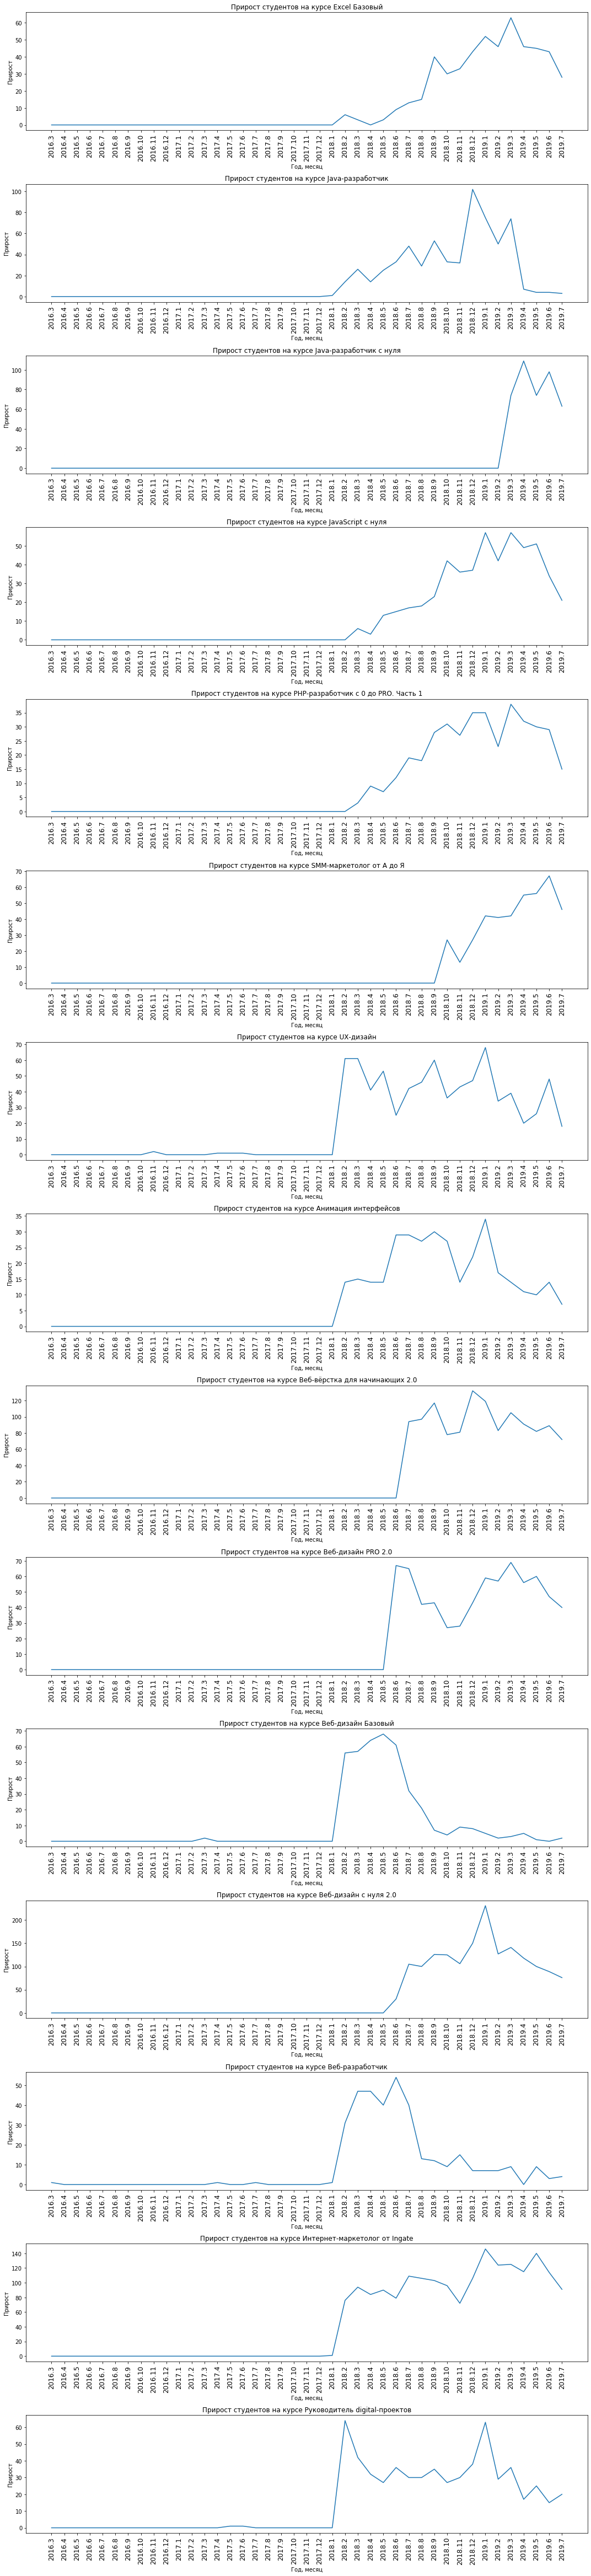

In [13]:
# Функции для определения значений по осям OX и OY для построения графиков:

def x(n):
    x = list(data81.loc[a[n - 1], :].index.values)
    for i in range(len(x)):
        x[i] = str(x[i][0]) + '.' + str(x[i][1])
    return x


def y(n):
    y = data81.loc[a[n - 1], :].values
    return y

# Доступ к Figure:
fig = plt.figure(figsize=(15, 65)) 

# Добавляем 15 графиков на нашу область рисования:

for i in range(len(a)):
    ax = fig.add_subplot(15, 1, i + 1)
    ax.plot(x(i + 1), y(i + 1))
    ax.set_title(f'Прирост студентов на курсе {a[i]}')

# Добавляем на каждую область рисования (на каждый график) названия осей, переворачиваем вертикально xticks:

for plot in fig.axes:
    plot.set_ylabel('Прирост')
    plot.set_xlabel('Год, месяц')
    plot.tick_params(axis='x', labelrotation=90, labelsize=12) 
fig.tight_layout()
plt.show()

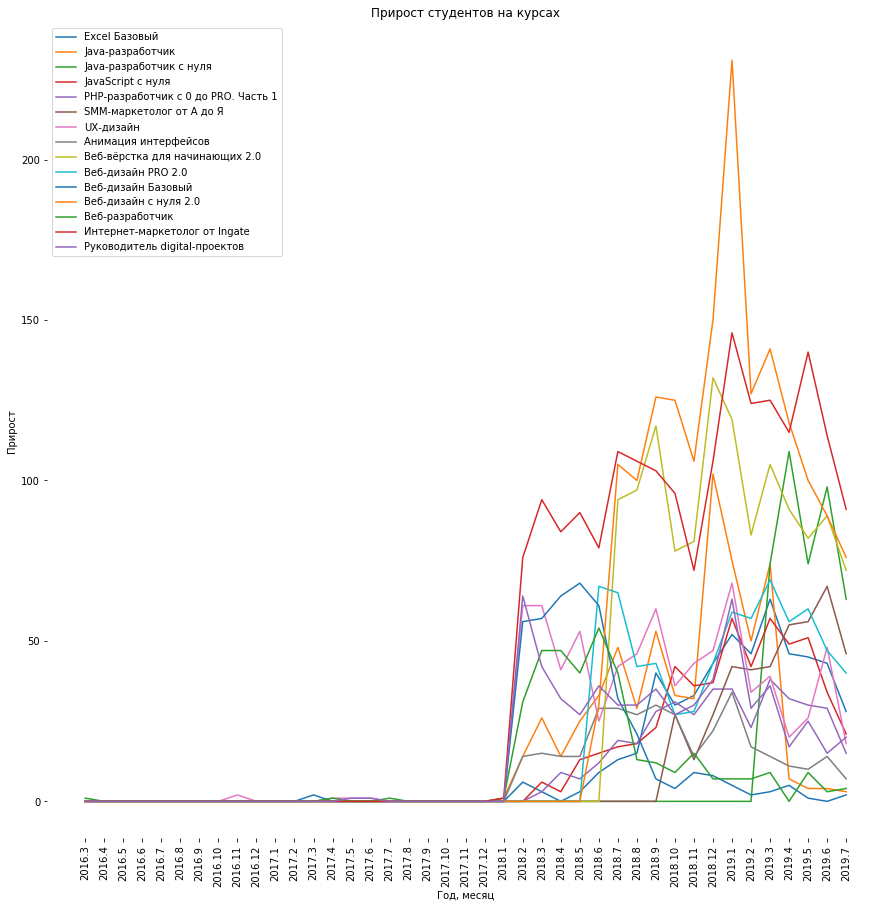

In [14]:
# Строим графики (15 линий) на одной области рисования:

fig, subplot = plt.subplots(figsize=(15, 15))

for i in range(len(a)):
    plt.plot(x(i + 1), y(i + 1), label=f'{a[i]}')

# Подписываем график, оси, переворачиваем вертикально xticks:

plt.title('Прирост студентов на курсах')
plt.ylabel('Прирост')
plt.xlabel('Год, месяц')
plt.xticks(rotation='vertical')

# Делаем границы графика прозрачными :

subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)
subplot.spines['left'].set_visible(False)
subplot.spines['bottom'].set_visible(False)

plt.legend()
plt.show()


In [7]:
# Сформируем датафрейм data10 из значений основного датафрейма, в которых есть домашняя работа, :

data10 = main[main['is_homework'] == True]

# Невыполненные домашние работы (работы со статусами start,fail,wait) учтём в каждом месяце с начала их
# выполнения до июля 2019:

data10['finish_date'] = data10['finish_date'].fillna(
    '2019-07-01 01:01:01.111111+00')

# Cконвертируем значения столбцов start_date и finish_date в более удобный для последующего расчёта вид %Y%m:

data10['start_date'] = data10['start_date'].astype('datetime64')
data10['finish_date'] = data10['finish_date'].astype('datetime64')

data10['start_date'] = data10['start_date'].apply(lambda x: x.strftime('%Y%m'))
data10['finish_date'] = data10['finish_date'].apply(
    lambda x: x.strftime('%Y%m'))

# Расчёт кол-ва выполненных домашних работ (прогрессов), НЕ перетекающих из одного месяца в другой в каждом месяце
# за всю историю:

data11 = data10[data10['start_date'] == data10['finish_date']]
data11 = data11.groupby(['course_title',
                         'start_date']).agg(['sum'])['is_homework']

# Сформируем датафрейм data12 со значениями, где выполнение домашней работы перетекает из одного месяца в другой,
# и преобразуем его вид:

data12 = data10[data10['start_date'] != data10['finish_date']]
data12 = data12.groupby(['course_title', 'start_date',
                         'finish_date']).agg(['sum'])['is_homework']

data12 = data12.reset_index()
data12['start_date'] = data12['start_date'].astype('int')
data12['finish_date'] = data12['finish_date'].astype('int')
data12.index = range(1188)

#  Т.к.дз, выполнение которых перетекает из одного месяца в другой, нужно включать в общее число прогрессов для ВСЕХ месяцев,
# которые покрывает срок выполнения этих дз, добавим для каждого значения в датафрейм все месяцы из промежутка:

for i in range(1188):
    while data12.loc[i, 'start_date'] != data12.loc[i, 'finish_date']:
        data12 = data12.append(data12.loc[i, :], ignore_index=True)
        if data12.loc[i, 'start_date'] % 100 == 12:
            data12.loc[i, 'start_date'] = data12.loc[i, 'start_date'] + 89
        else:
            data12.loc[i, 'start_date'] = data12.loc[i, 'start_date'] + 1

data12 = data12.loc[:, ['start_date', 'sum', 'course_title']]
data12 = data12.groupby(['course_title', 'start_date']).agg('sum')

# Теперь у нас два датафрейма одного вида: data11 - с дз, не перетекающими из одного месяца в другой, и data12 - с
# перетекающими дз, прогресс для которых учтён в каждом месяце промежутка. Объединим их и сгруппируем значения:

data13 = data12.append(data11)
data13 = data13.reset_index()
data13['start_date'] = data13['start_date'].astype('str')
data13 = data13.groupby(['course_title', 'start_date']).agg('sum')

# Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю:
data13


C:\Users\Daria\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Daria\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Daria\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

sum
course_title                  start_date       
Excel Базовый                 201802       37.0
                              201803        9.0
                              201804       16.0
                              201805       21.0
                              201806       41.0
...                                         ...
Руководитель digital-проектов 201903      705.0
                              201904      641.0
                              201905      668.0
                              201906      643.0
                              201907      645.0

[258 rows x 1 columns]

In [8]:
# Для правильного построения графиков добавим в полученный датафрейм месяцы, в которых количество прогрессов по выполнению
# домашних работ равно нулю.

# Для этого создадим датафрейм, аналогичный полученному, но с нулевыми значениями (с марта 2016 по июль 2019):

a1 = sorted(
    list(data13.index.levels[1]) + [
        '201604', '201605', '201606', '201607', '201608', '201609', '201610',
        '201708', '201709', '201710', '201711', '201712'
    ])

indx = pd.MultiIndex.from_product(
    [list(data13.index.levels[0]), a1], names=['course_title', 'start_date'])

data130 = pd.DataFrame(0, indx, ['sum'])

# Соединяем датафреймы, преобразуем вид:

data131 = data130.merge(data13, how='left', left_index=True, right_index=True)
data131 = data131.drop(columns='sum_x')
data131 = data131.fillna(0)

# Количество прогрессов по выполнению домашних работ на каждом курсе в каждом месяце за всю историю с марта 2016 по
# июль 2019 (с месяцами, в которых количество прогрессов по выполнению домашних работ равно нулю):

data131


sum_y
course_title                  start_date       
Excel Базовый                 201603        0.0
                              201604        0.0
                              201605        0.0
                              201606        0.0
                              201607        0.0
...                                         ...
Руководитель digital-проектов 201903      705.0
                              201904      641.0
                              201905      668.0
                              201906      643.0
                              201907      645.0

[615 rows x 1 columns]

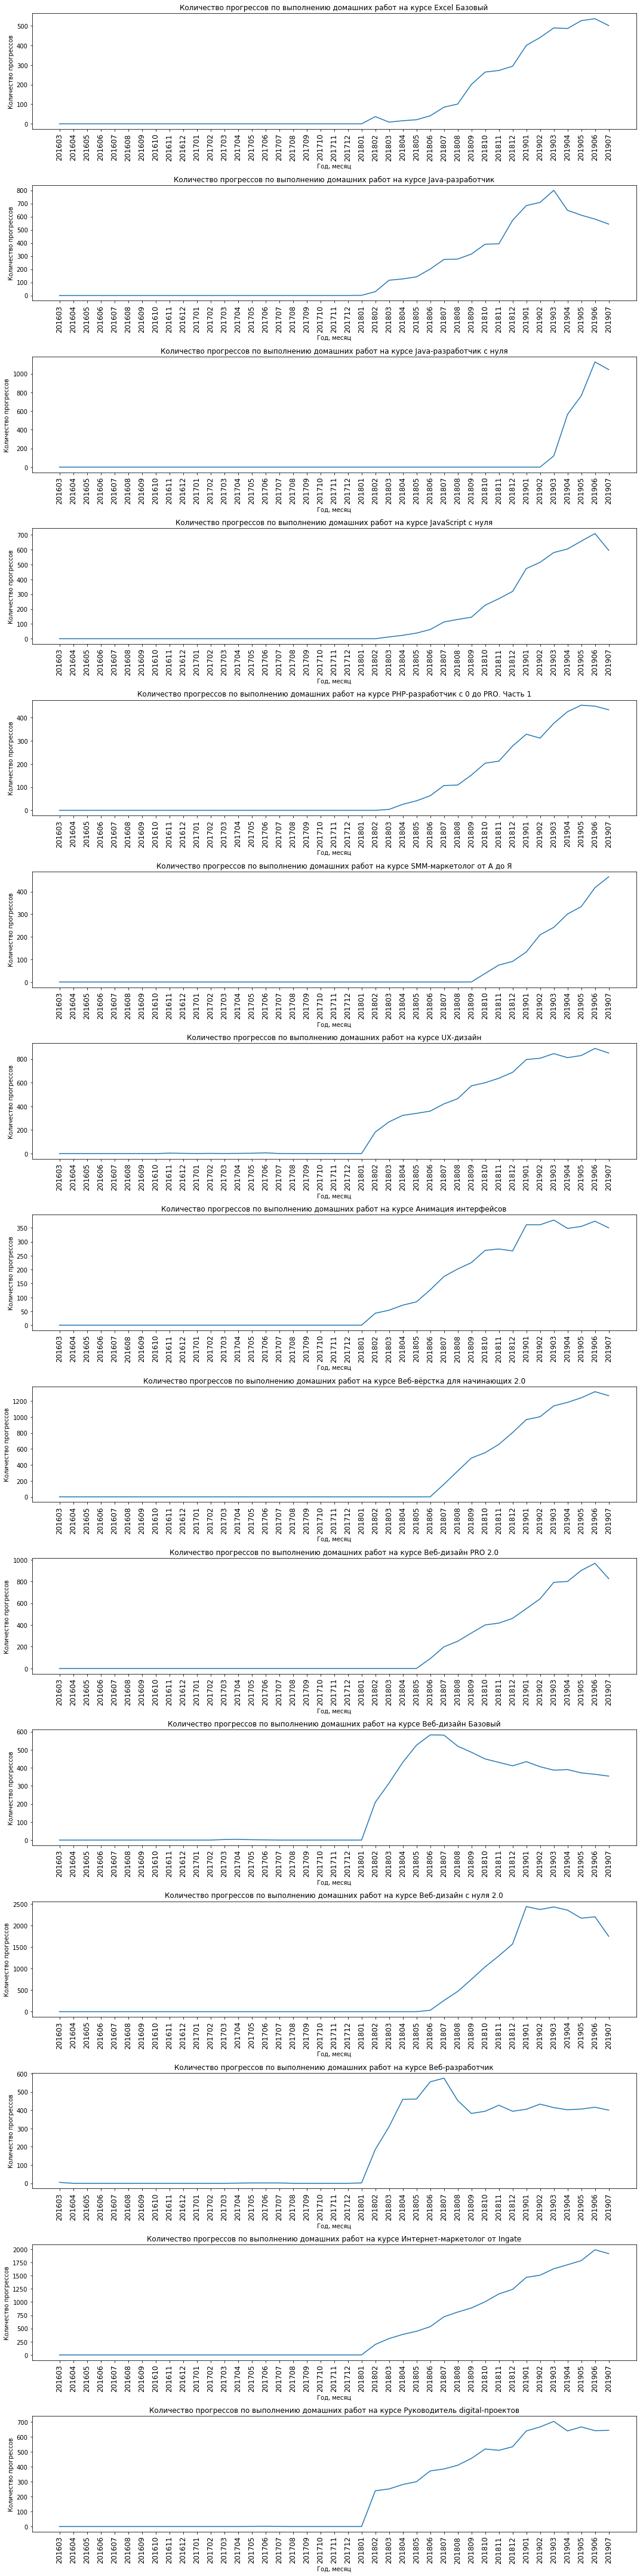

In [9]:
a = list(data131.index.levels[0])

# Функции для определения значений по осям OX и OY для построения графиков:


def x(n):
    x = list(data131.loc[a[n - 1], :].index.values)
    return x


def y(n):
    y = data131.loc[a[n - 1], :].values
    return y


# Доступ к Figure:

fig = plt.figure(figsize=(15, 60))

# Добавляем 15 графиков на нашу область рисования:

for i in range(len(a)):
    ax = fig.add_subplot(15, 1, i + 1)
    ax.plot(x(i + 1), y(i + 1))
    ax.set_title(
        f'Количество прогрессов по выполнению домашних работ на курсе {a[i]}')

# Добавляем на каждую область рисования (на каждый график) названия осей, переворачиваем вертикально xticks:

for plot in fig.axes:
    plot.set_ylabel('Количество прогрессов')
    plot.set_xlabel('Год, месяц')
    plot.tick_params(axis='x', labelrotation=90, labelsize=12)
fig.tight_layout()
plt.show()


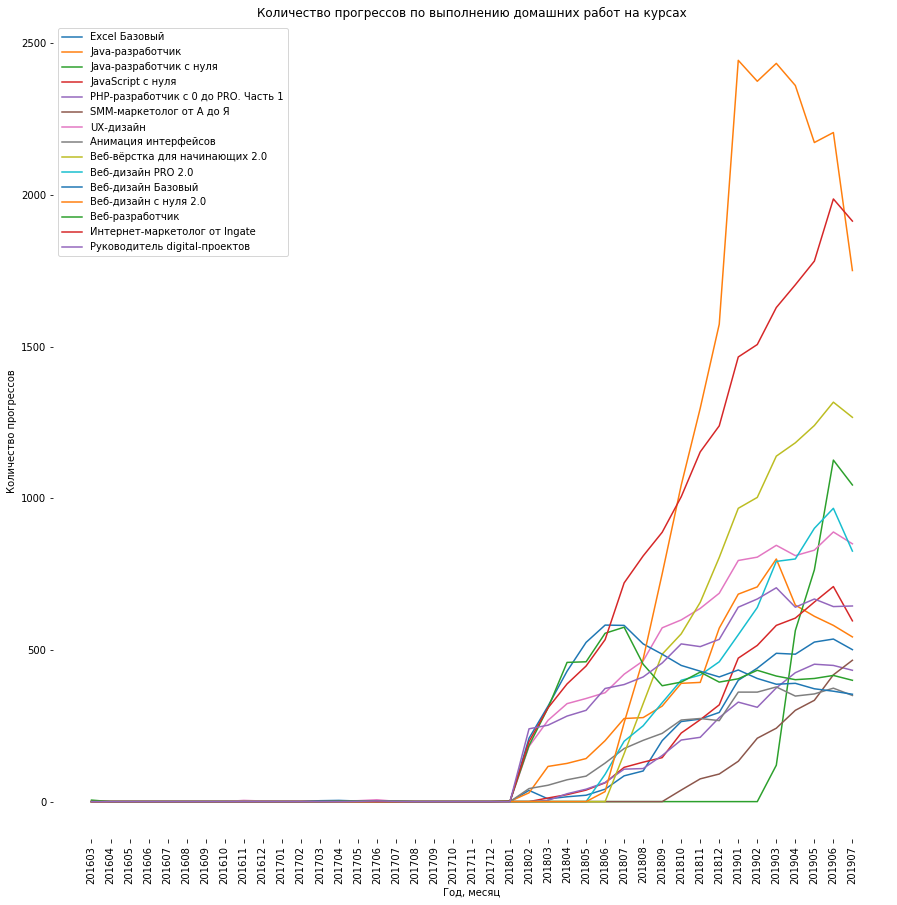

In [10]:
# Строим графики (15 линий) на одной области рисования:

fig, subplot = plt.subplots(figsize=(15, 15))

for i in range(len(a)):
    plt.plot(x(i + 1), y(i + 1), label=f'{a[i]}')

# Подписываем график, оси, переворачиваем вертикально xticks:

plt.title('Количество прогрессов по выполнению домашних работ на курсах')
plt.ylabel('Количество прогрессов')
plt.xlabel('Год, месяц')
plt.xticks(rotation='vertical')

# Делаем границы графика прозрачными :

subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)
subplot.spines['left'].set_visible(False)
subplot.spines['bottom'].set_visible(False)

plt.legend()
plt.show()


На всех курсах значительный прирост студентов наблюдается во второй половине рассматриваемого периода - начиная с февраля 2018 года, при этом самый максимальный прирост студентов за всю историю наблюдается на курсе "Веб-дизайн с нуля 2.0" в январе 2019 года и составляет 231 человек, также в этом же месяце наблюдается максимальный прирост студентов в сумме по всем курсам - 993 человека, ненамного меньше в марте 2019 года - 889 человек. В целом пик прироста студентов приходится на период с декабря 2018 по июнь 2019, в июле 2019 наблюдается небольшой спад.

Значительная нагрузка на преподавателей, как и значительный прирост студентов, также наблюдается во второй половине рассматриваемого периода - с февраля 2018 года. При этом максимальная нагрузка на преподавателей за всю историю наблюдается на курсе "Веб-дизайн с нуля 2.0" в январе 2019 года и составляет 2444 домашних работ(прогрессов по выполнению). Максимальная нагрузка на преподавателей в сумме по всем курсам наблюдается в июне 2019 года - 12982 домашние работы, и в целом пик максимальной потенциальной нагрузки приходится на конец рассматриваемого периода - с января по июль 2019 года(более 10000 домашних работ в каждом месяце).

In [ ]:
# Прирост студентов по месяцам в сумме по всем курсам:
data8.groupby(['year','month']).agg(['sum'])

In [ ]:
# Количество прогрессов по выполнению домашних работ по месяцам в сумме по всем курсам:
data13.groupby(['start_date']).agg('sum')

## 3. Выявление проблемных модулей

1. Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле.     
2. На основании первого пункта построим line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков               
3. Чтобы выявить сезонность, посчитаем медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.                   
4. На основании третьего пункта построим line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике.               
5. Аналитический вывод            

In [13]:
# Сформируем датафрейм с данными о модулях, в которых есть домашние работы, очистим от данных, в которых нет даты завершения, и
# преобразуем столбцы с датами в формат datetime:

data14 = main[main['is_homework'] == True]
data14 = data14.dropna()
data14['start_date'] = data14['start_date'].astype('datetime64')
data14['finish_date'] = data14['finish_date'].astype('datetime64')


In [14]:
# Рассчитаем время прохождения модуля с несколькими домашними заданиями - курс 'Java-разработчик c нуля', модуль 4:
# Сформируем датафрейм с нужными значениями:

data15 = data14[(data14['course_title'] == 'Java-разработчик c нуля')
                & (data14['module_number'] == 4)]
data16 = data15[data15['lesson_title'] == 'Домашняя работа 4.6']
data16 = data16.groupby('student_id').agg('max')

data17 = data15[data15['lesson_title'] == 'Домашняя работа 4.1']
data17 = data17.groupby('student_id').agg('max')

data18 = data16.merge(data17, on='student_id')

# Рассчитаем разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней
# домашней работы:

data18['time'] = data18['finish_date_x'] - data18['start_date_y']

# Преобразуем датафрейм в более удобный вид:

data18 = data18.reset_index()
data18 = data18.loc[:, ['course_title_x', 'module_number_x', 'time']]
data18 = data18.rename(columns={'course_title_x': 'course_title'})
data18 = data18.rename(columns={'module_number_x': 'module_number'})

# Время прохождения модуля 4 на курсе 'Java-разработчик c нуля':
# data18


In [15]:
# Рассчитаем время прохождения модуля с несколькими домашними заданиями - курс 'Java-разработчик c нуля', модуль 5:
# Сформируем датафрейм с нужными значениями:

data19 = data14[(data14['course_title'] == 'Java-разработчик c нуля')
                & (data14['module_number'] == 5)]
data20 = data19[data19['lesson_title'] == 'Домашняя работа 5.5']
data20 = data20.groupby('student_id').agg('max')

data21 = data19[data19['lesson_title'] == 'Домашняя работа 5.1']
data21 = data21.groupby('student_id').agg('max')

data22 = data20.merge(data21, on='student_id')

# Рассчитаем разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней
# домашней работы:

data22['time'] = data22['finish_date_x'] - data22['start_date_y']

# Преобразуем датафрейм в более удобный вид:

data22 = data22.reset_index()
data22 = data22.loc[:, ['course_title_x', 'module_number_x', 'time']]
data22 = data22.rename(columns={'course_title_x': 'course_title'})
data22 = data22.rename(columns={'module_number_x': 'module_number'})

# Время прохождения модуля 5 на курсе 'Java-разработчик c нуля':
# data22


In [16]:
# Рассчитаем время прохождения модуля с несколькими домашними заданиями - курс 'UX-дизайн', модуль 9:
# Сформируем датафрейм с нужными значениями:

data23 = data14[(data14['course_title'] == 'UX-дизайн')
                & (data14['module_number'] == 9)]
data24 = data23[data23['lesson_title'] == 'Домашняя работа (вторая часть)']
data24 = data24.groupby('student_id').agg('max')

data25 = data23[data23['lesson_title'] == 'Домашняя работа (первая часть)']
data25 = data25.groupby('student_id').agg('max')

data26 = data24.merge(data25, on='student_id')

# Рассчитаем разность между временем начала выполнения первой части домашней работы и временем окончания выполнения второй
# части домашней работы:
data26['time'] = data26['finish_date_x'] - data26['start_date_y']

# В данном модуле трое студентов выполнили вторую часть домашней работу раньше первой, внесем поправки для более точного
# расчета:

data26.loc['3cd0c5bfc9d001950e79f88be5f8d571', 'time'] = (
    data26.loc['3cd0c5bfc9d001950e79f88be5f8d571', 'finish_date_y'] -
    data26.loc['3cd0c5bfc9d001950e79f88be5f8d571', 'start_date_x'])
data26.loc['96e17efb3bd6b190dca71083bcb18cb1', 'time'] = (
    data26.loc['96e17efb3bd6b190dca71083bcb18cb1', 'finish_date_y'] -
    data26.loc['96e17efb3bd6b190dca71083bcb18cb1', 'start_date_x'])
data26.loc['d3687c1d9beb51f8ebc7f7b2b595c8b4', 'time'] = (
    data26.loc['d3687c1d9beb51f8ebc7f7b2b595c8b4', 'finish_date_y'] -
    data26.loc['d3687c1d9beb51f8ebc7f7b2b595c8b4', 'start_date_x'])

# Преобразуем датафрейм в более удобный вид:
data26 = data26.reset_index()
data26 = data26.loc[:, ['course_title_x', 'module_number_x', 'time']]
data26 = data26.rename(columns={'course_title_x': 'course_title'})
data26 = data26.rename(columns={'module_number_x': 'module_number'})

# Время прохождения модуля 9 на курсе 'UX-дизайн':
# data26


In [17]:
# Рассчитаем время прохождения модуля с несколькими домашними заданиями - курс 'Веб-дизайн PRO 2.0', модуль 4:
# Сформируем датафрейм с нужными значениями:

data27 = data14[(data14['course_title'] == 'Веб-дизайн PRO 2.0')
                & (data14['module_number'] == 4)]
data28 = data27[data27['lesson_title'] == 'Домашнее задание #2']
data28 = data28.groupby('student_id').agg('max')

data29 = data27[data27['lesson_title'] == 'Домашнее задание #1']
data29 = data29.groupby('student_id').agg('max')

data30 = data28.merge(data29, on='student_id')

# Рассчитаем разность между временем начала выполнения первой домашней работы и временем окончания выполнения второй
# домашней работы:

data30['time'] = data30['finish_date_x'] - data30['start_date_y']

# Преобразуем датафрейм в более удобный вид:
data30 = data30.reset_index()
data30 = data30.loc[:, ['course_title_x', 'module_number_x', 'time']]
data30 = data30.rename(columns={'course_title_x': 'course_title'})
data30 = data30.rename(columns={'module_number_x': 'module_number'})

# Время прохождения модуля 4 на курсе 'Веб-дизайн PRO 2.0':
# data30


In [18]:
# Рассчитаем время прохождения модулей с одним домашним заданием:
# Сформируем датафрейм с нужными значениями:

data31 = data14[~((data14['course_title'] == 'Java-разработчик c нуля') &
                  (data14['module_number'] == 4))]
data31 = data31[~((data31['course_title'] == 'Java-разработчик c нуля') &
                  (data31['module_number'] == 5))]
data31 = data31[~(
    (data14['course_title'] == 'UX-дизайн') & (data14['module_number'] == 9))]
data31 = data31[~((data14['course_title'] == 'Веб-дизайн PRO 2.0') &
                  (data14['module_number'] == 4))]

# Рассчитаем разность между временем начала выполнения домашней работы и временем окончания выполнения домашней работы:
data31['time'] = data31['finish_date'] - data31['start_date']
data31 = data31.loc[:, ['course_title', 'module_number', 'time']]

# Очистим датафрейм от нереальных отрицательных (ошибочных) значений:
data31 = data31[data31['time'] > '0 days']

# Время прохождения модулей с одним домашним заданием:
# data31


C:\Users\Daria\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Daria\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [19]:
# Объединим все полученные выше датафреймы с временем прохождения модулей:

data32 = pd.concat([data18, data22, data26, data30, data31], ignore_index=True)
data32 = data32.groupby(
    ['course_title',
     'module_number'])['time'].describe()[['min', 'max', 'mean', '50%']]

# Минимальное, максимальное, среднее, медианное время прохождения каждого модуля на каждом курсе:
data32


min  \
course_title                  module_number                   
Excel Базовый                 1             00:52:49.101080   
                              2             00:53:46.720239   
                              3             00:28:21.958252   
                              4             01:45:43.006464   
                              5             01:22:41.490445   
...                                                     ...   
Руководитель digital-проектов 12            00:00:00.001770   
                              13            00:00:00.001537   
                              14            00:00:00.002027   
                              15            00:00:00.003103   
                              16            00:00:00.002448   

                                                                 max  \
course_title                  module_number                            
Excel Базовый                 1             183 days 17:57:52.247793   
                              2             184 days 06:27:48.841839   
                              3              89 days 03:11:50.758958   
                              4             327 days 13:09:58.465046   
                              5             175 days 13:10:49.724595   
...                                                              ...   
Руководитель digital-проектов 12            211 days 13:38:10.145467   
                              13            246 days 20:15:03.960003   
                              14            199 days 03:15:55.467643   
                              15            132 days 04:58:36.764804   
                              16            355 days 15:06:19.654443   

                                                               mean  \
course_title                  module_number                           
Excel Базовый                 1              6 days 01:03:55.201511   
                              2              4 days 08:22:23.940379   
                              3              3 days 10:46:33.700404   
                              4             11 days 00:52:27.254254   
                              5              7 days 10:54:43.013561   
...                                                             ...   
Руководитель digital-проектов 12            23 days 02:18:21.878687   
                              13            28 days 23:54:58.857109   
                              14            16 days 10:29:00.685754   
                              15             7 days 10:32:25.744683   
                              16            20 days 16:30:35.132611   

                                                                50%  
course_title                  module_number                          
Excel Базовый                 1              2 days 07:56:55.715077  
                              2              1 days 20:57:26.256583  
                              3              1 days 12:14:41.442344  
                              4              3 days 06:06:38.675476  
                              5              3 days 02:03:42.691376  
...                                                             ...  
Руководитель digital-проектов 12             7 days 22:15:52.628980  
                              13            13 days 19:08:01.208274  
                              14             8 days 21:15:36.368612  
                              15             2 days 20:03:22.659668  
                              16             7 days 03:25:08.849894  

[190 rows x 4 columns]

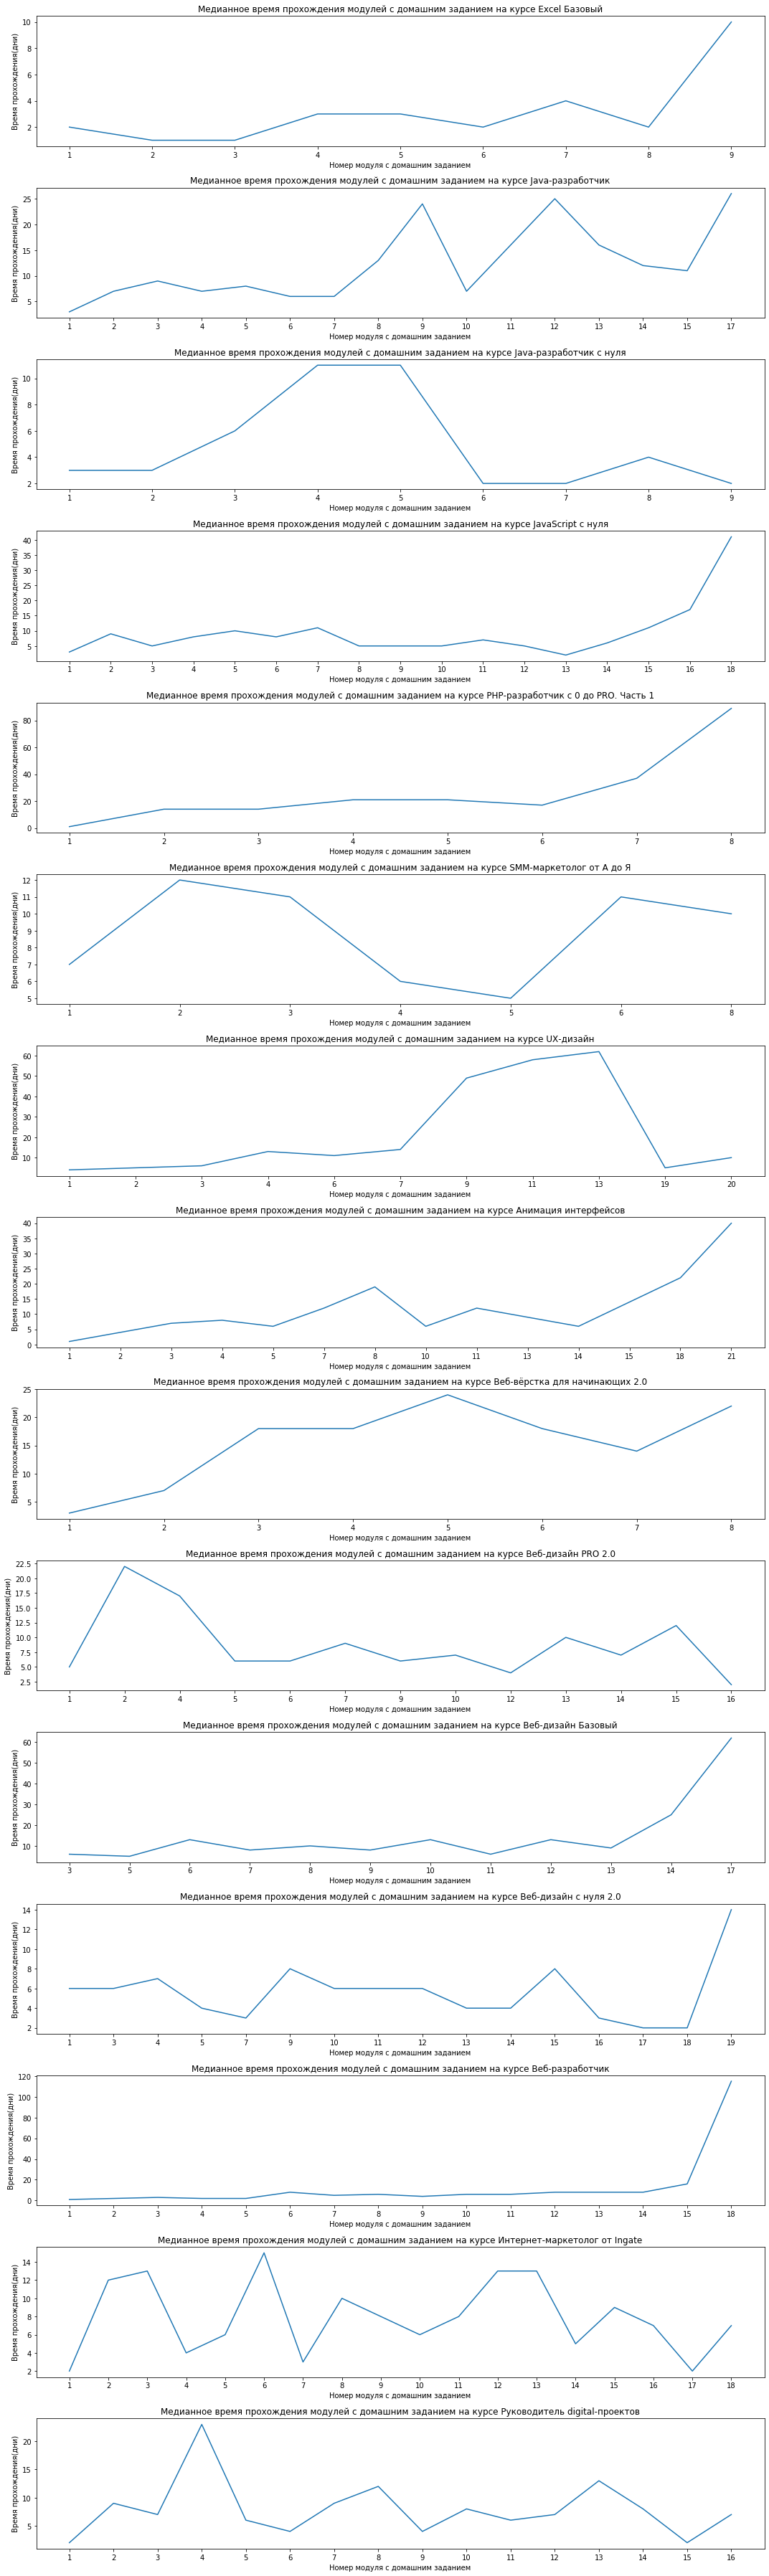

In [9]:
# Для построения графика медианного прохождения модулей на каждом курсе преобразуем столбец '50%' из формата timedelta64[ns]
# в формат timedelta64[D] для более наглядного представления:

data32['50%'] = data32['50%'].astype('timedelta64[D]')

a = list(data32.index.levels[0])

# Функции для определения значений по осям OX и OY для построения графиков:


def x(n):
    x = list(data32.loc[a[n - 1], '50%'].index.values)
    x = list(map(lambda y: str(y), x))
    return x


def y(n):
    y = list(data32.loc[a[n - 1], '50%'].values)
    return y


# Доступ к Figure:

fig = plt.figure(figsize=(15, 50))

# Добавляем 15 графиков на нашу область рисования:

for i in range(len(a)):
    ax = fig.add_subplot(15, 1, i + 1)
    ax.plot(x(i + 1), y(i + 1))
    ax.set_title(
        f'Медианное время прохождения модулей с домашним заданием на курсе {a[i]}'
    )

# Добавляем на каждую область рисования (на каждый график) названия осей:

for plot in fig.axes:
    plot.set_ylabel('Время прохождения(дни)')
    plot.set_xlabel('Номер модуля с домашним заданием')
fig.tight_layout()
plt.show()


In [3]:
# Т.к. выполнение домашней работы зачастую перетекает из одного месяца в другой, то медианное время выполнения домашней 
# работы по месяцам для каждого курса будем рассчитывать по месяцу НАЧАЛА выполнения домашней работы, к тому же этого вполне 
# достаточно, чтобы получить представление о сезонности по построенным ниже графикам.

# Добавим столбцы с временем выполнения домашней работы и месяцем начала её выполнения:

data14['timehw'] = data14['finish_date'] - data14['start_date']
data14['month'] = data14['start_date'].apply(lambda x: x.month)
data14 = data14.groupby(['course_title','month'])['timehw'].describe()['50%']
data14 = data14.to_frame()

# Медианное время выполнения домашних работ, начатых в n-ном месяце, для каждого курса:
data14

50%
course_title                  month                        
Excel Базовый                 1      2 days 05:15:40.334257
                              2      2 days 05:46:39.750756
                              3      2 days 19:52:58.386801
                              4      1 days 22:33:43.881223
                              5      2 days 09:55:16.146759
...                                                     ...
Руководитель digital-проектов 8     13 days 13:27:50.949325
                              9     10 days 02:37:07.207776
                              10     4 days 20:23:30.326083
                              11     6 days 00:05:40.666425
                              12     7 days 22:30:12.242404

[171 rows x 1 columns]

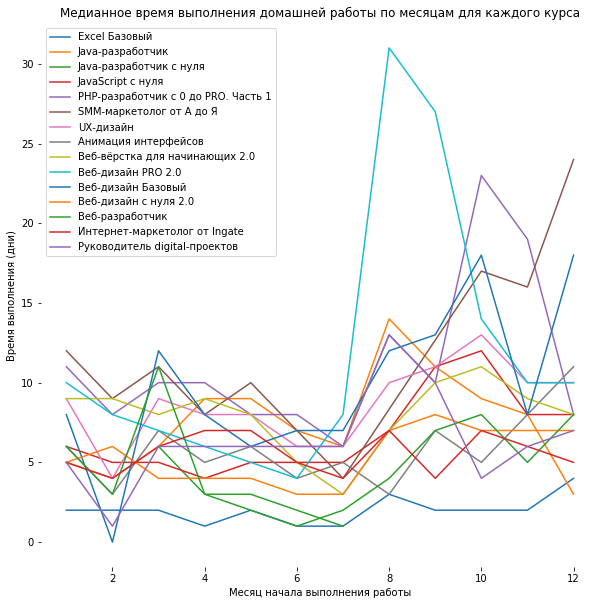

In [4]:
# Для построения графика медианного времени выполнения дз на каждом курсе преобразуем данные из формата timedelta64[ns]
# в формат timedelta64[D] для более наглядного представления:

data14 = data14.astype('timedelta64[D]')

a = list(data14.index.levels[0])

# Функции для определения значений по осям OX и OY для построения графиков:


def x(n):
    x = list(data14.loc[a[n - 1], :].index.values)
    return x


def y(n):
    y = list(data14.loc[a[n - 1], :].values)
    return y


# Строим графики (15 линий) на одной области рисования:

fig, subplot = plt.subplots(figsize=(10, 10))

for i in range(len(a)):
    plt.plot(x(i + 1), y(i + 1), label=f'{a[i]}')

# Подписываем график и оси:

plt.title(
    'Медианное время выполнения домашней работы по месяцам для каждого курса')
plt.ylabel('Время выполнения (дни)')
plt.xlabel('Месяц начала выполнения работы')

# Делаем границы графика прозрачными :

subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)
subplot.spines['left'].set_visible(False)
subplot.spines['bottom'].set_visible(False)

plt.legend()
plt.show()

# Как видно на графике, не для всех курсов есть данные по каждому месяцу (н-р, курс 'Java-разработчик c нуля', ноябрь-февраль)
# - т.е. ни один студент на данном курсе не начал выполнение домашней работы в данных месяцах, что полностью коррелирует
# с рассчитанными выше данными о прогрессах по выполнению домашних работ(пункты 2.4,2.5,2.6).

Модули, на выполнение домашних заданий которых студенты тратили больше времени, чем на остальные (такие модули можно 
назвать проблемными):

    'Java-разработчик' -  модули 9,12
    'Java-разработчик c нуля' -  модули 4, 5
    'UX-дизайн' - модули 9, 11, 13
    'Веб-дизайн PRO 2.0' - модули 2, 4
    'Руководитель digital-проектов' - модуль 4

Также следует отметить, что на выполнение итоговых домашних заданий на следующих курсах студенты тратили значительно больше 
времени,чем на выполнение рядовых заданий:

    'Excel Базовый', модуль 9 
    'Java-разработчик', модуль 17
    'JavaScript с нуля', модуль 18 
    'PHP-разработчик с 0 до PRO. Часть 1', модуль 8 
    'Анимация интерфейсов' - модуль 21 
    'Веб-дизайн Базовый' - модуль 17 
    'Веб-дизайн с нуля 2.0' - модуль 19 
    'Веб-разработчик'- модуль 18
    
В том числе итоговое задание на курсе 'Веб-разработчик' оказалось самым сложным - на его выполнение студентам в среднем 
требовалось 123 дня.
    
В среднем меньше всего времени на выполнение домашней работы студентам требуется с апреля по июль включительно, начиная
с сентября и по январь студенты выполняют домашние работы значительно медленнее. Ниже приведены месяцы, когда студентам
требуется больше всего времени на выполнение дз (имеет место сезонность):

    'Java-разработчик' -август-сентябрь
    'JavaScript с нуля' сентябрь-октябрь
    'PHP-разработчик с 0 до PRO. Часть 1' октябрь-ноябрь
    'SMM-маркетолог от А до Я'  октябрь-декабрь
    'UX-дизайн' октябрь
    'Анимация интерфейсов' декабрь
    'Веб-вёрстка для начинающих 2.0' сентябрь-октябрь
    'Веб-дизайн PRO 2.0' август-октябрь
    'Веб-дизайн Базовый' август-октябрь,декабрь
    'Веб-разработчик' март,октябрь,декабрь
    'Руководитель digital-проектов' август-сентябрь

## 4. Расчет конверсии

1. Посчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе (отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.
3. Построим горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. 
4. Аналитический вывод

In [2]:
# Расчет количества студентов, приступивших к выполнению домашнего задания в каждом модуле:

data33 = main[main['is_homework'] == True]
data33 = data33.groupby([
    'course_title', 'module_number', 'module_title'
]).agg(student_start=pd.NamedAgg(column='student_id', aggfunc='nunique'))
# здесь кол-во уникальных студентов - это и есть кол-во приступивших к выполнению дз в модуле (и к выполнению первого
# дз в тех модулях, где их несколько).
# data33


In [3]:
# Расчет количества студентов, сдавших домашнее задание в каждом модуле:

data34 = main[(main['is_homework'] == True) & (main['status'] == 'done')]
data34 = data34.groupby(
    ['course_title', 'module_number', 'module_title',
     'lesson_title']).agg('nunique')['student_id']
data34 = data34.groupby(['course_title', 'module_number',
                         'module_title']).agg('min')
# здесь минимальное кол-во студентов - это и есть кол-во студентов, сдавших домашнее задание в модуле(и сдавших последнее
# дом задание в тех модулях, где их несколько)

data34 = data34.to_frame()
# data34


In [4]:
# Получим датафрейм с кол-вом студентов 'student_start', приступивших к работе, и с кол-вом студентов 'student_done', которые 
# выполнили домашнее задание, для каждого модуля:
data33['student_done'] = data34['student_id']
# data33


In [5]:
# Добавим в датафрейм столбец со значениями 'student_done', опустим его значения на одно вниз для последующего деления
# на этот столбец при вычислении конверсии:
data33['student_done_2'] = data33['student_done'].shift(1)

# Удалим из датафрейма значения для первых модулей с домашними работами в каждом курсе
# (для курса 'Веб-дизайн Базовый' это третий модуль), а также данные по модулю 13 на курсе 'Анимация интерфейсов', т.к.
# за 12ый модуль нет ни одной выполненной домашней работы (для них конверсию посчитать невозможно):

data33 = data33.reset_index()
data33 = data33[data33['module_number'] != 1]
data33 = data33[~((data33['course_title'] == 'Веб-дизайн Базовый') &
                  (data33['module_number'] == 3))]
data33 = data33[~((data33['course_title'] == 'Анимация интерфейсов') &
                  (data33['module_number'] == 13))]

data33 = data33.groupby(['course_title', 'module_number',
                         'module_title']).agg('max')

# Конверсия перехода студентов из одного модуля в другой:
data33['conv'] = data33['student_start'] / data33['student_done_2']
# data33


In [6]:
# Медианное значение конверсии по каждому курсу:
data35 = data33.groupby('course_title').median()['conv']
data35

course_title
Excel Базовый                          0.981883
Java-разработчик                       1.011561
Java-разработчик c нуля                0.959194
JavaScript с нуля                      1.000000
PHP-разработчик с 0 до PRO. Часть 1    1.055556
SMM-маркетолог от А до Я               0.958753
UX-дизайн                              1.008268
Анимация интерфейсов                   0.985915
Веб-вёрстка для начинающих 2.0         1.033582
Веб-дизайн PRO 2.0                     1.015388
Веб-дизайн Базовый                     1.004717
Веб-дизайн с нуля 2.0                  0.993322
Веб-разработчик                        1.055556
Интернет-маркетолог от Ingate          0.987805
Руководитель digital-проектов          0.995349
Name: conv, dtype: float64

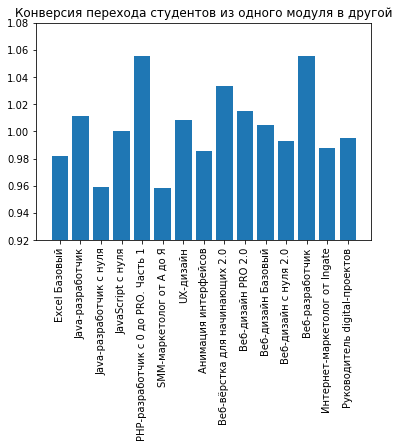

In [7]:
# Строим bar-chart, отражающий медианное значение конверсии по каждому курсу:

fig, subplot = plt.subplots()
subplot.bar(data35.index.values, data35.values)
plt.xticks(rotation='vertical')
subplot.set_title('Конверсия перехода студентов из одного модуля в другой')
subplot.set_ylim(bottom=0.92, top=1.08)
plt.show()


In [8]:
# Сформируем датафрейм с данными о конверсии перехода студентов из одного модуля в другой для построения графиков:

data36 = data33['conv']
data36 = data36.reset_index()
data36['module_number'] = data36['module_number'].astype('str')
data36['module'] = data36['module_number'] + ' . ' + data36['module_title']
data36 = data36.groupby(['course_title',
                         'module']).agg('max')[['module_number', 'conv']]
# data36


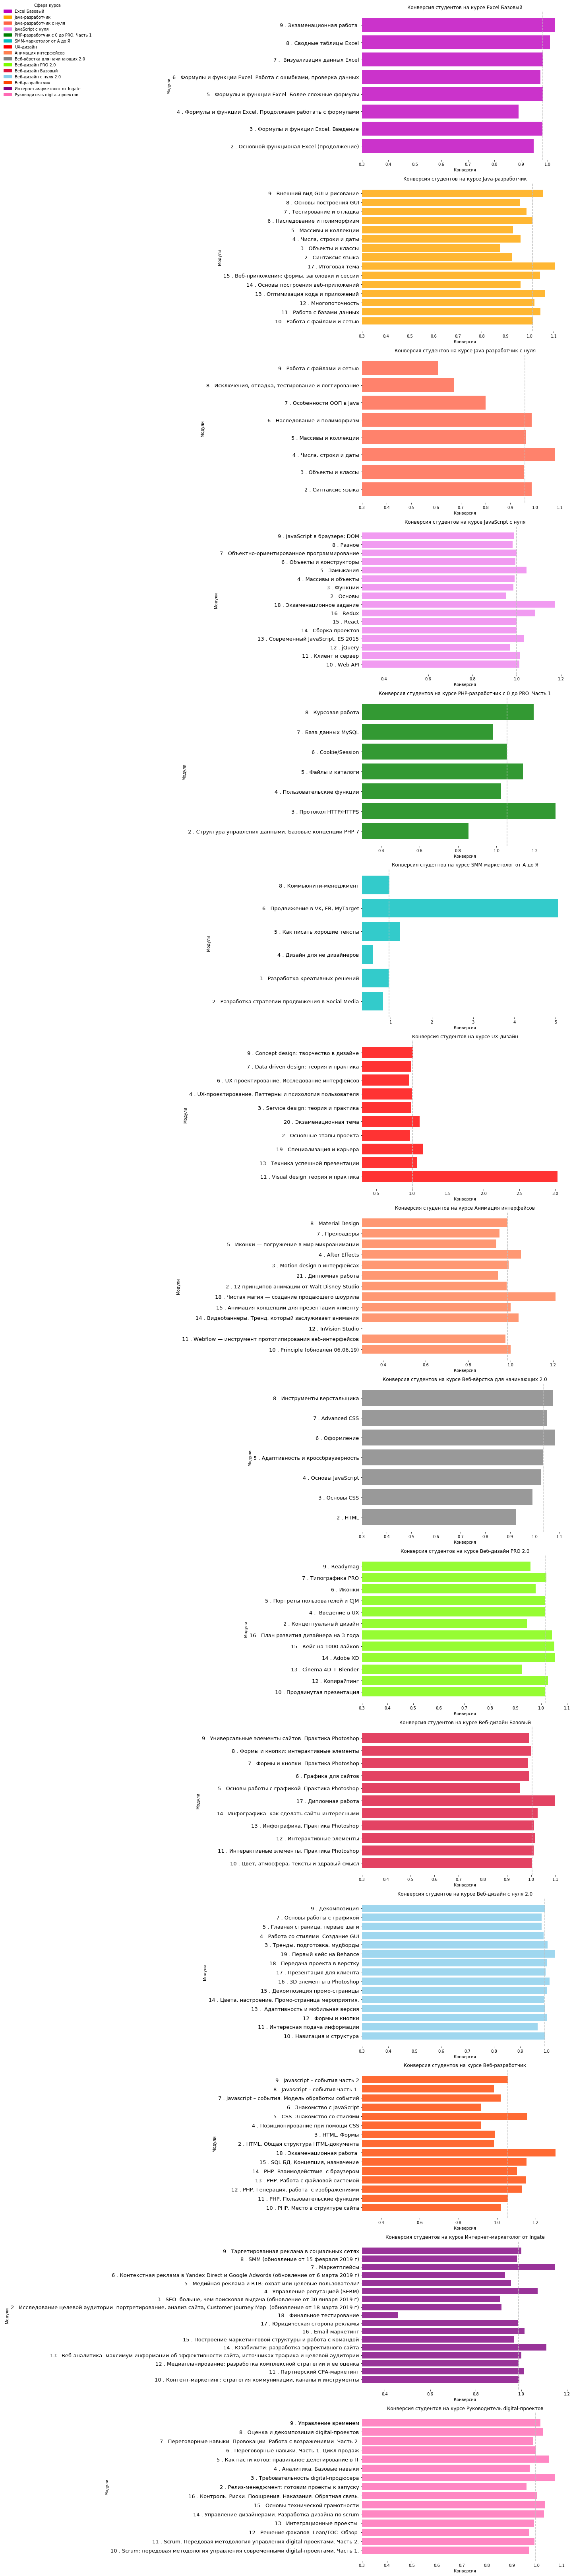

In [9]:
# Доступ к Figure и subplot:

fig = plt.figure(figsize=(20, 90))
a = list(data36.index.levels[0])

# Список цветов столбцов на графиках:
c = [
    'm', 'orange', 'tomato', 'violet', 'green', 'c', 'r', 'coral', 'grey',
    'lawngreen', 'crimson', 'skyblue', 'orangered', 'purple', 'hotpink'
]

# Добавляем 15 графиков на нашу область рисования:
for i in range(len(a)):
    ax = fig.add_subplot(15, 1, i + 1)
    ax.barh(
        list(data36.loc[a[i], :].index),
        list(data36.loc[a[i], 'conv'].values.ravel()),
        color=c[i],
        alpha=0.8)
    ax.set_title(f'Конверсия студентов на курсе {a[i]}')
    ax.set_ylabel('Модули')
    ax.set_xlabel('Конверсия')
    ax.tick_params(axis='y', labelsize=13)
    ax.tick_params(axis='x', labelsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(left=0.3)
    ax.axvline(x = data35.values[i], linestyle = 'dashed', color = 'silver',
               zorder = 3)

# Добавляем легенду на график:

patch1 = mpatches.Patch(color=c[0], label=a[0])
patch2 = mpatches.Patch(color=c[1], label=a[1])
patch3 = mpatches.Patch(color=c[2], label=a[2])
patch4 = mpatches.Patch(color=c[3], label=a[3])
patch5 = mpatches.Patch(color=c[4], label=a[4])
patch6 = mpatches.Patch(color=c[5], label=a[5])
patch7 = mpatches.Patch(color=c[6], label=a[6])
patch8 = mpatches.Patch(color=c[7], label=a[7])
patch9 = mpatches.Patch(color=c[8], label=a[8])
patch10 = mpatches.Patch(color=c[9], label=a[9])
patch11 = mpatches.Patch(color=c[10], label=a[10])
patch12 = mpatches.Patch(color=c[11], label=a[11])
patch13 = mpatches.Patch(color=c[12], label=a[12])
patch14 = mpatches.Patch(color=c[13], label=a[13])
patch15 = mpatches.Patch(color=c[14], label=a[14])


fig.legend(
    handles=[
        patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9,
        patch10, patch11, patch12, patch13, patch14, patch15
    ],
    loc='upper left', frameon = False, title = 'Сфера курса')

fig.tight_layout()
plt.show()


   Аномально высокая конверсия переходов студентов из одного модуля в другой была выявлена на следующих модулях:

     'SMM-маркетолог от А до Я' модуль 6 'Продвижение в VK, FB, MyTarget' - конверсия 5.0,
     'UX-дизайн' модуль 11 'Visual Design теория и практика' - конверсия 3.0,
 
это может быть связано с большой популярностью и востребованностью данных направлений на рынке и, как следствие, высокой
заинтересованностью студентов (приступают к выполнению дз на этих модулях, не выполнив предыдущие).А самая низкая конверсия переходов студентов была выявлена на следующем модуле:
      
      'Анимация интерфейсов' модуль 12 'Invision Studio' - конверсия 0.08

   В среднем (по медианным значениям) самая высокая конверсия была зафиксирована на курсах:

       'PHP-разработчик с 0 до PRO. Часть 1' - конверсия 1.05
       'Веб-разработчик'- конверсия 1.05,
т.е. студенты на этих курсах чаще других переходят из модуля в модуль, не выполнив текущее домашнее задание, а самая низкая на
курсах :

        'Java-разработчик c нуля' - конверсия 0.96
        'SMM-маркетолог от А до Я' - конверсия 0.96,
        
т.е. студенты этих курсов чаще теряют интерес к выполнению следующего модуля после выполнения текущего.
   
   Интересно, что на курсах 'Java-разработчик' и 'Java-разработчик c нуля' с одинаковыми модулями 2-5 конверсия переходов студентов была выше на курсе 'Java-разработчик c нуля'.